<a href="https://colab.research.google.com/github/VedantMukhekar/DSML/blob/main/Pneumonia_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO LINK THE GOOGLE COLAB WITH MY KAGGLE ACOUNT

In [ ]:
import os
import numpy as np
os.environ['KAGGLE_USERNAME'] = "vedantmukhekar272004"
os.environ['KAGGLE_KEY'] = "28739d1288d2cf227bb6aa942bee9820"

In [ ]:
!kaggle datasets download rajumavinmar/pnemonia-classification-bacterialviralnormal

 98% 297M/303M [00:04<00:00, 106MB/s]
100% 303M/303M [00:04<00:00, 71.8MB/s]


In [ ]:
!unzip /content/pnemonia-classification-bacterialviralnormal.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Normal/Normal_2505.png  
  inflating: dataset/Normal/Normal_2506.png  
  inflating: dataset/Normal/Normal_2507.png  
  inflating: dataset/Normal/Normal_2508.png  
  inflating: dataset/Normal/Normal_2509.JPG  
  inflating: dataset/Normal/Normal_251.JPG  
  inflating: dataset/Normal/Normal_2510.png  
  inflating: dataset/Normal/Normal_2511.png  
  inflating: dataset/Normal/Normal_2512.png  
  inflating: dataset/Normal/Normal_2513.png  
  inflating: dataset/Normal/Normal_2514.JPG  
  inflating: dataset/Normal/Normal_2515.JPG  
  inflating: dataset/Normal/Normal_2516.JPG  
  inflating: dataset/Normal/Normal_2517.png  
  inflating: dataset/Normal/Normal_2518.png  
  inflating: dataset/Normal/Normal_2519.png  
  inflating: dataset/Normal/Normal_252.JPG  
  inflating: dataset/Normal/Normal_2520.png  
  inflating: dataset/Normal/Normal_2521.JPG  
  inflating: dataset/Normal/Normal_2522.png  
  inflating: dataset/Normal/Nor

In [ ]:
len(os.listdir('/content/dataset/Bacterial_Pnemonia'))

3617

In [ ]:
len(os.listdir('/content/dataset/Normal'))

3620

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/dataset/Normal/Normal_1.JPG')

In [ ]:
import matplotlib.pyplot as plt

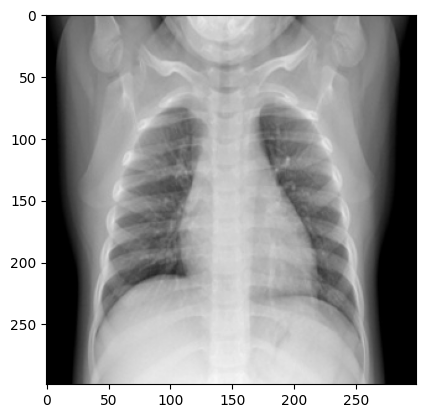

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

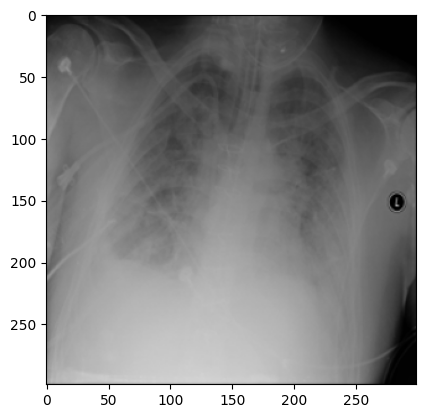

In [ ]:
img1 = cv2.imread('/content/dataset/Bacterial_Pnemonia/Bacterial_Pnemonia_1009.png')
plt.imshow(img1)

In [ ]:
img1.shape

(299, 299, 3)

TRAINING PART

In [ ]:
urls = os.listdir('/content/dataset/Bacterial_Pnemonia')

In [ ]:
urls

['Bacterial_Pnemonia_744.png',
 'Bacterial_Pnemonia_2646.JPG',
 'Bacterial_Pnemonia_758.png',
 'Bacterial_Pnemonia_2031.png',
 'Bacterial_Pnemonia_2730.png',
 'Bacterial_Pnemonia_474.png',
 'Bacterial_Pnemonia_3017.png',
 'Bacterial_Pnemonia_1123.png',
 'Bacterial_Pnemonia_2651.JPG',
 'Bacterial_Pnemonia_973.png',
 'Bacterial_Pnemonia_241.png',
 'Bacterial_Pnemonia_1913.JPG',
 'Bacterial_Pnemonia_1283.png',
 'Bacterial_Pnemonia_2617.JPG',
 'Bacterial_Pnemonia_1698.png',
 'Bacterial_Pnemonia_1395.JPG',
 'Bacterial_Pnemonia_438.JPG',
 'Bacterial_Pnemonia_2147.png',
 'Bacterial_Pnemonia_2393.png',
 'Bacterial_Pnemonia_834.JPG',
 'Bacterial_Pnemonia_3469.png',
 'Bacterial_Pnemonia_1740.png',
 'Bacterial_Pnemonia_852.png',
 'Bacterial_Pnemonia_801.JPG',
 'Bacterial_Pnemonia_3369.JPG',
 'Bacterial_Pnemonia_1144.png',
 'Bacterial_Pnemonia_3489.png',
 'Bacterial_Pnemonia_11.JPG',
 'Bacterial_Pnemonia_3202.png',
 'Bacterial_Pnemonia_2976.png',
 'Bacterial_Pnemonia_450.JPG',
 'Bacterial_Pnemonia

In [ ]:
path = "/content/dataset/Bacterial_Pnemonia"

In [ ]:
path

'/content/dataset/Bacterial_Pnemonia'

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
#load images function with variables like pneumonia path...[loaded pneumonia images]
Pneumonia_path ="/content/dataset/Bacterial_Pnemonia"
PneumoniaURL = os.listdir(Pneumonia_path)
PneumoniaImages,PneumoniaTargets = loadImages (Pneumonia_path , PneumoniaURL, 1)

In [ ]:
len(PneumoniaURL) , len(PneumoniaImages)

(3617, 3617)

In [ ]:
import numpy as np

In [ ]:
#load images function with variables like normal...[loaded normal images]
Normal_path = "/content/dataset/Normal"
NormalURL =os.listdir('/content/dataset/Normal')
NormalImage,normalTargets = loadImages (Normal_path, NormalURL, 0)

In [ ]:
len(NormalURL) , len(NormalImage)

(3620, 3620)

In [ ]:
#As images variable was a list.. so type casting-->numpy array[converting into numpy.array]
PneumoniaImages = np.asarray(PneumoniaImages)
NormalImage = np.asarray(NormalImage)

In [ ]:
PneumoniaImages.shape

(3617, 100, 100, 3)

In [ ]:
NormalImage.shape

(3620, 100, 100, 3)

In [ ]:
#To convert both the images into a single variable x_train concatinating numpy row wise
data = np.r_[PneumoniaImages, NormalImage]

In [ ]:
data.shape

(7237, 100, 100, 3)

In [ ]:
target = np.r_[PneumoniaTargets, normalTargets]

In [ ]:
target.shape

(7237,)

NOW DATA IS READY TO PASS IN TRAIN TEST SPLIT
NOW SPLITTING THE DATA BRAVO!!!

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
x_train.shape

(5427, 100, 100, 3)

In [ ]:
y_train.shape

(5427,)

In [ ]:
x_test.shape

(1810, 100, 100, 3)

In [ ]:
y_test.shape

(1810,)

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape=(100, 100, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


SUMMARY OF THE MODEL

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 16)        0

COMPILATION OF THE MODEL

In [ ]:
model.compile(optimizer= 'adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

TRAINING THE MODEL

In [ ]:
# BY USING FIT METHOOD
model.fit(x_train, y_train, batch_size=32, epochs=20,validation_data=(x_test, y_test))

Epoch 1/20
170/170 [==============================] - 58s 330ms/step - loss: 0.3365 - accuracy: 0.8478 - val_loss: 0.2220 - val_accuracy: 0.9006
Epoch 2/20
170/170 [==============================] - 56s 327ms/step - loss: 0.2417 - accuracy: 0.8963 - val_loss: 0.2467 - val_accuracy: 0.8901
Epoch 3/20
170/170 [==============================] - 55s 323ms/step - loss: 0.1959 - accuracy: 0.9156 - val_loss: 0.1836 - val_accuracy: 0.9243
Epoch 4/20
170/170 [==============================] - 60s 353ms/step - loss: 0.1604 - accuracy: 0.9313 - val_loss: 0.1939 - val_accuracy: 0.9155
Epoch 5/20
170/170 [==============================] - 56s 327ms/step - loss: 0.1454 - accuracy: 0.9414 - val_loss: 0.1600 - val_accuracy: 0.9260
Epoch 6/20
170/170 [==============================] - 53s 315ms/step - loss: 0.1202 - accuracy: 0.9504 - val_loss: 0.1680 - val_accuracy: 0.9293
Epoch 7/20
170/170 [==============================] - 54s 319ms/step - loss: 0.1028 - accuracy: 0.9593 - val_loss: 0.1679 - val_ac

In [ ]:
model.save("pneunomiadetection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


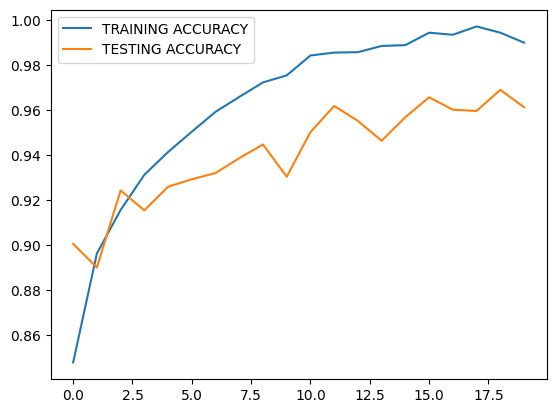

In [ ]:
plt.plot(model.history.history['accuracy'], label='TRAINING ACCURACY')
plt.plot(model.history.history['val_accuracy'], label='TESTING ACCURACY')
plt.legend()
plt.show()

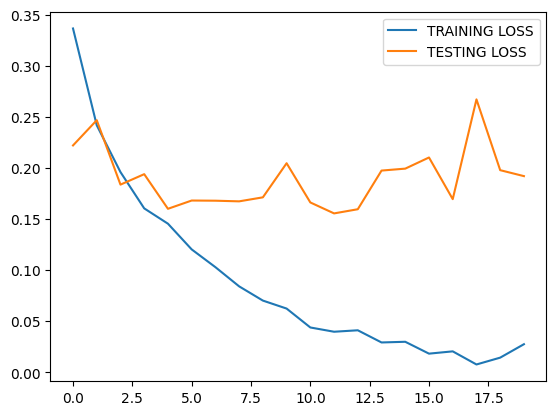

In [ ]:
plt.plot(model.history.history['loss'], label='TRAINING LOSS')
plt.plot(model.history.history['val_loss'], label='TESTING LOSS')
plt.legend()
plt.show()

In [ ]:
#testing modeule
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load the model
model = load_model('/content/pneunomiadetection.h5')

# Load and preprocess the image for pneumonia
img_path ="/content/dataset/Normal/Normal_1024.png"
test_img = image.load_img(img_path, target_size=(100, 100))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)

# Make predictions
result = model.predict(test_img)
rst=float(result)
print(rst)

# Assuming the model predicts binary classification (0 or 1)
if rst ==1:
    print("PNEUMONIA IS DETECTED!!!NEED TO START THE TREATMENT")
else:
    print("NO PNEUMONIA DETECTED")
# else:
#   print( "ERROR!!!PLEASE TRY AGAIN!!!")


1/1 [==============================] - 0s 107ms/step
0.0
NO PNEUMONIA DETECTED


<ipython-input-48-2f2fa0c14476>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rst=float(result)


In [ ]:
#testing modeule
import numpy as np
from keras.preprocessing import image
from keras.models import load_model

# Load  model
model = load_model('/content/pneunomiadetection.h5')

# Load and preprocessing of image for non pneumonia
img_path = "/content/dataset/Normal/Normal_1000.JPG"
test_img = image.load_img(img_path, target_size=(100, 100))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)

# Make predictions
result = model.predict(test_img)
print(result)
# Assuming the model predicts binary classification (0 or 1)
if result > 0.5:
    print("Pneumonia")
else:
    print("Not Pneumonia")
# else:
#   print("ERROR!!!PLEASE TRY AGAIN!!!")

1/1 [==============================] - 0s 181ms/step
[[1.]]
Pneumonia
